# Mi intención es, sobre este dataset, averiguar cómo afectan diversos valores de temperatura a la cantidad de viajes en bicicleta, para así podes detectar las condiciones ideales

# Para ello voy a cargar los datos y explorarlos (tipos de datos, valores) corrigiendo donde haga falta. Luego de reunir los datos necesarios podré responder a la pregunta que tengo.

In [1]:
%matplotlib inline

import math
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
status = pd.read_csv("Set de datos TP1/status.csv",iterator=True,chunksize=100000)
station = pd.read_csv("Set de datos TP1/station.csv")
weather = pd.read_csv("Set de datos TP1/weather.csv")
trip = pd.read_csv("Set de datos TP1/trip.csv")

In [3]:
#Status es muy grande como para procesarlo todo junto, tomamos solamente una parte para ver qué tipo de datos tiene
status_partial = status.get_chunk()

In [4]:
#Para cada estación tenemos, minuto a minuto, la información de cuántas bicicletas disponibles hay.
status_partial

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01
5,2,2,25,2013/08/29 12:11:01
6,2,2,25,2013/08/29 12:12:01
7,2,2,25,2013/08/29 12:13:01
8,2,2,25,2013/08/29 12:15:01
9,2,2,25,2013/08/29 12:16:02


In [5]:
#Verificamos los tipos de datos
status_partial.dtypes

station_id          int64
bikes_available     int64
docks_available     int64
time               object
dtype: object

In [6]:
#Vemos qué forma tiene station. Podemos ver que cada registro nos muestra información sobre cada una de las 
#estaciones del circuito.
station

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [7]:
#Revisamos si hay datos faltantes. En este caso todos los registros tienen su valor.
station.isnull().any()

id                   False
name                 False
lat                  False
long                 False
dock_count           False
city                 False
installation_date    False
dtype: bool

In [8]:
#Verificación de los tipos de datos. Cambiamos installation_date por un formato más conveniente como datetime
station.dtypes

id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object

In [9]:
#Corregido
station.installation_date = pd.to_datetime(station.installation_date, errors = 'coerce')
station.dtypes

id                            int64
name                         object
lat                         float64
long                        float64
dock_count                    int64
city                         object
installation_date    datetime64[ns]
dtype: object

In [10]:
#Weather nos da información de las condiciones meteorológicas día a día. La columna zip code representa a qué
#zona de la bahía de San Francisco pertenece la información. Es por eso que se repite el mismo día varias veces, cada
#uno de esos días repetidos pertenece a una zona diferente
weather

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107
5,9/3/2013,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,10.0,10.0,24.0,15.0,31.0,0,2.0,NaN,276.0,94107
6,9/4/2013,74.0,68.0,61.0,59.0,57.0,56.0,90.0,72.0,53.0,...,10.0,10.0,29.0,19.0,35.0,0,4.0,NaN,269.0,94107
7,9/5/2013,72.0,66.0,60.0,57.0,56.0,54.0,90.0,74.0,57.0,...,10.0,10.0,31.0,21.0,37.0,0,3.0,NaN,270.0,94107
8,9/6/2013,85.0,71.0,56.0,57.0,51.0,45.0,86.0,58.0,29.0,...,10.0,10.0,24.0,8.0,28.0,0,0.0,NaN,287.0,94107
9,9/7/2013,88.0,73.0,58.0,64.0,54.0,46.0,86.0,59.0,31.0,...,10.0,10.0,21.0,8.0,25.0,0,1.0,NaN,305.0,94107


In [11]:
#Veamos si hay datos nulos. En este caso la mayoría de los campos tienen al menos un registro nulo, lo tendré en cuenta cuando
#trabaje con ellos
weather.isnull().any()

date                              False
max_temperature_f                  True
mean_temperature_f                 True
min_temperature_f                  True
max_dew_point_f                    True
mean_dew_point_f                   True
min_dew_point_f                    True
max_humidity                       True
mean_humidity                      True
min_humidity                       True
max_sea_level_pressure_inches      True
mean_sea_level_pressure_inches     True
min_sea_level_pressure_inches      True
max_visibility_miles               True
mean_visibility_miles              True
min_visibility_miles               True
max_wind_Speed_mph                 True
mean_wind_speed_mph                True
max_gust_speed_mph                 True
precipitation_inches               True
cloud_cover                        True
events                             True
wind_dir_degrees                   True
zip_code                          False
dtype: bool

In [12]:
#Vemos que weather tiene 'Rain' y 'rain' entre sus valores, vamos a normalizarlo
weather.events.value_counts()

Rain                 388
Fog                  112
Fog-Rain              17
Rain-Thunderstorm      3
rain                   2
Name: events, dtype: int64

In [13]:
weather.events=weather.events.str.replace('rain','Rain')
weather.events.value_counts()

Rain                 390
Fog                  112
Fog-Rain              17
Rain-Thunderstorm      3
Name: events, dtype: int64

In [14]:
#Verificamos los tipos, vemos que el campo precipitation_inches es un object. Sería más apropiado que fuera
#float 64. También voy  convertir la fecha a un formato más conveniente.
weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

In [15]:
#Ahora sí, está corregido
weather.precipitation_inches = pd.to_numeric(weather.precipitation_inches, errors = 'coerce')
weather.date = pd.to_datetime(weather.date, errors = 'coerce')
weather.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                     float64
cloud_cover         

In [16]:
#En trip tenemos información sobre cada uno de los viajes que se realizaron durante el período analizado
trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [17]:
#Miremos los valores de duracion de los viajes.Observamos que hay viajes que duran meses, no tiene mucho sentido tenerlos en cuenta.

trip.sort_values('duration',ascending=False)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
573566,568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
382718,825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
440339,750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
371066,841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
80510,111309,722236,11/30/2013 13:29,University and Emerson,35,12/8/2013 22:06,University and Emerson,35,247,Customer,94301
606063,522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
223016,323594,716480,6/13/2014 16:57,Harry Bridges Plaza (Ferry Building),50,6/21/2014 23:59,Civic Center BART (7th at Market),72,633,Subscriber,94131
195379,361321,715339,7/13/2014 5:50,Arena Green / SAP Center,14,7/21/2014 12:32,Adobe on Almaden,5,251,Customer,nil
421839,774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
524521,635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451


In [18]:
#Analizaré, como máximo, viajes que duren un día. Borramos entonces los viajes cuya duración exceda los 86400 segundos

trip_partial = trip[trip.duration > 86400]
trip = trip.drop(trip_partial.index)
trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [19]:
#Veamos ahora cuál es el valor mínimo de la duración. Los viajes más cortos duran un minuto, pero vemos que hay varios viajes
#que inician y terminan en el mismo lugar. Eso tampoco tiene mucho sentido y puede que se trate de una anomalía del set de datos
#Vamos a eliminar los registros que comiencen y terminen en la misma estación

trip.sort_values('duration',ascending=True)


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
3535,9444,60,9/3/2013 8:37,Redwood City Public Library,24,9/3/2013 8:38,Redwood City Public Library,24,239,Subscriber,94105
160540,410597,60,8/15/2014 15:15,Broadway St at Battery St,82,8/15/2014 15:16,Broadway St at Battery St,82,516,Subscriber,94107
633879,483333,60,10/4/2014 19:21,Yerba Buena Center of the Arts (3rd @ Howard),68,10/4/2014 19:22,Yerba Buena Center of the Arts (3rd @ Howard),68,560,Customer,nil
40000,57581,60,10/14/2013 14:47,Clay at Battery,41,10/14/2013 14:48,Clay at Battery,41,368,Subscriber,94158
426791,768325,60,5/15/2015 8:58,Howard at 2nd,63,5/15/2015 8:59,2nd at South Park,64,602,Subscriber,94702
10457,18792,60,9/12/2013 10:09,Civic Center BART (7th at Market),72,9/12/2013 10:10,Civic Center BART (7th at Market),72,632,Subscriber,94103
666342,438041,60,9/4/2014 10:53,Civic Center BART (7th at Market),72,9/4/2014 10:54,Civic Center BART (7th at Market),72,291,Subscriber,94117
326026,900176,60,8/21/2015 13:24,Temporary Transbay Terminal (Howard at Beale),55,8/21/2015 13:25,Temporary Transbay Terminal (Howard at Beale),55,522,Subscriber,94109
450401,736948,60,4/22/2015 17:47,Embarcadero at Folsom,51,4/22/2015 17:48,Embarcadero at Folsom,51,585,Subscriber,94103
547555,603851,60,1/14/2015 12:37,Golden Gate at Polk,59,1/14/2015 12:38,Golden Gate at Polk,59,548,Subscriber,94109


In [20]:
#Listo

trip_partial = trip[trip.start_station_id==trip.end_station_id]
trip = trip.drop(trip_partial.index)
trip.sort_values('duration',ascending=True)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
354233,863009,60,7/27/2015 8:30,San Francisco Caltrain (Townsend at 4th),70,7/27/2015 8:31,San Francisco Caltrain 2 (330 Townsend),69,336,Subscriber,94403
556034,592699,60,1/6/2015 11:38,South Van Ness at Market,66,1/6/2015 11:39,Market at 10th,67,621,Subscriber,94123
426791,768325,60,5/15/2015 8:58,Howard at 2nd,63,5/15/2015 8:59,2nd at South Park,64,602,Subscriber,94702
380218,829206,60,6/30/2015 20:37,Post at Kearny,47,6/30/2015 20:38,2nd at South Park,64,410,Subscriber,94107
466586,715358,61,4/7/2015 16:41,2nd at Folsom,62,4/7/2015 16:42,2nd at South Park,64,352,Subscriber,94107
345585,874329,61,8/4/2015 7:24,Market at Sansome,77,8/4/2015 7:26,2nd at South Park,64,334,Subscriber,94549
366741,846792,61,7/14/2015 20:37,Market at Sansome,77,7/14/2015 20:38,2nd at South Park,64,100,Subscriber,94602
351247,866905,61,7/29/2015 9:17,Temporary Transbay Terminal (Howard at Beale),55,7/29/2015 9:18,2nd at South Park,64,578,Subscriber,94710
621357,501676,61,10/16/2014 11:13,San Francisco Caltrain (Townsend at 4th),70,10/16/2014 11:14,San Francisco Caltrain 2 (330 Townsend),69,344,Subscriber,94010
363369,851118,61,7/17/2015 12:10,Embarcadero at Folsom,51,7/17/2015 12:11,Spear at Folsom,49,492,Subscriber,94105


In [21]:
#Veamos si hay datos nulos. Solamente hay algunos viajes que no tienen identificado el zip code
#Dependiendo de qué vaya a hacer luego con los datos puede que me convenga borrar esa columna o no, por ahora la dejo
trip.isnull().any()

id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool

In [22]:
#Verificamos los tipos, sería conveniente tener los datos de fecha en formato datetime. Debido al tamaño de este dataframe voy
#a dejar las fechas como están y convertirlas luego si hace falta.
trip.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

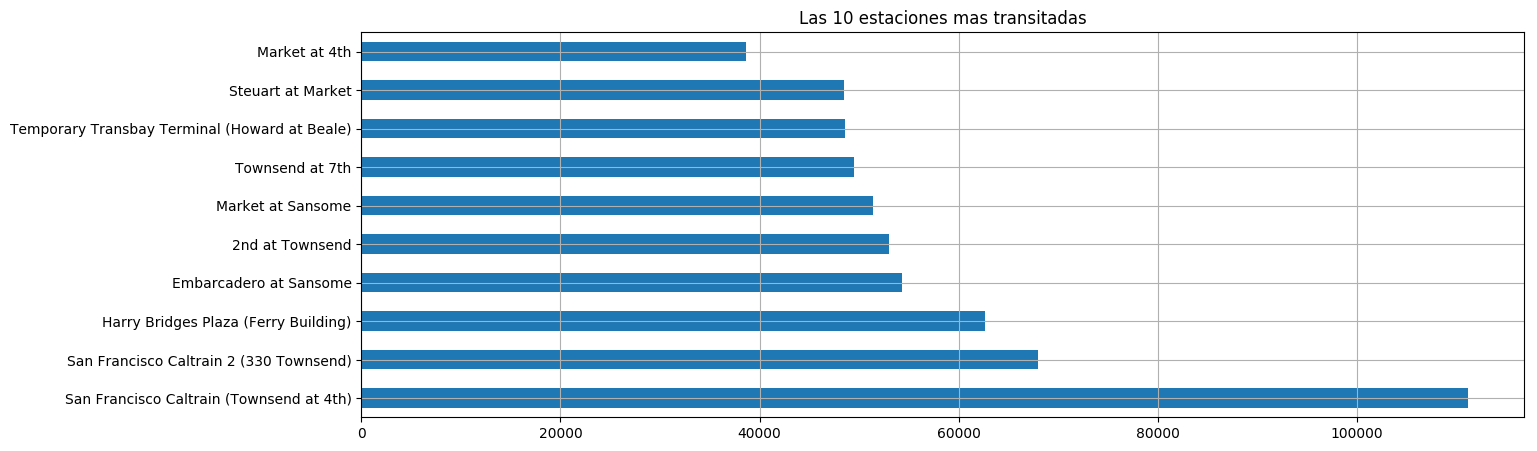

In [23]:
#Ya analizamos la forma de los datos que tenemos y hemos corregido algunos puntos. Vamos a comenzar a explorar los datos.
#Comenzamos haciendo un analisis de las estaciones, veamos cuáles son las diez más transitadas.

most_popular_start_stations = trip.start_station_name.value_counts().sort_values(ascending = False)
most_popular_end_stations = trip.end_station_name.value_counts().sort_values(ascending = False)
most_popular_stations = (most_popular_start_stations + most_popular_end_stations).sort_values(ascending = False)
most_popular_stations[:10].plot.barh(title = 'Las 10 estaciones mas transitadas', grid = True)


In [24]:
#Veamos, sobre la estación más popular, su movimiento durante el año. 
trip.start_date = pd.to_datetime(trip.start_date, errors = 'coerce')
transito_salida = trip[trip.start_station_name == 'San Francisco Caltrain (Townsend at 4th)']
transito_llegada = trip[trip.end_station_name == 'San Francisco Caltrain (Townsend at 4th)' ]
transito_total = pd.concat([transito_salida,transito_llegada])
transito_total = transito_total.drop_duplicates()
transito_total.start_date = transito_total.start_date.dt.date
transito_total['trafico_del_dia'] = 1
transito_total = transito_total.loc[:,['start_date','trafico_del_dia']]


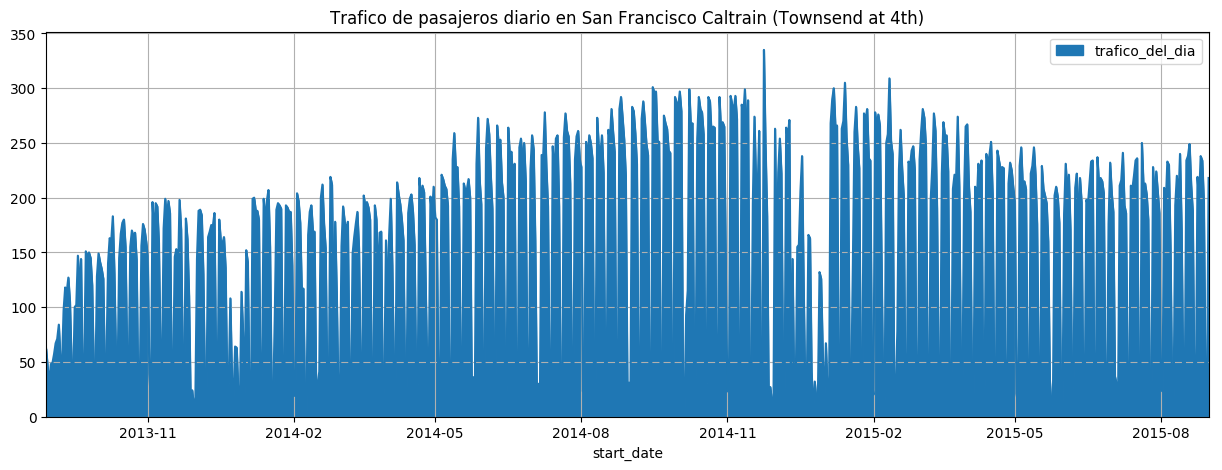

In [41]:
#Podemos ver que en el 2014, tuvo mucho más tránsito comparado contra el mismo período del año pasado    
transito_total.groupby('start_date').aggregate(sum).plot.area(grid=True, title='Trafico de pasajeros diario en San Francisco Caltrain (Townsend at 4th)')
transito_total.plot?

In [ ]:
transito_total.groupby('start_date').aggregate(sum).plot

In [26]:
#Veamos la cantidad de viajes segun la hora del dia

hora_viajes = trip.loc[:,['start_date']]
hora_viajes.start_date = hora_viajes.start_date.dt.time
hora_viajes['cantidad_viajes'] = 1
cantidad_viajes_segun_horario = hora_viajes.groupby('start_date').aggregate(sum)

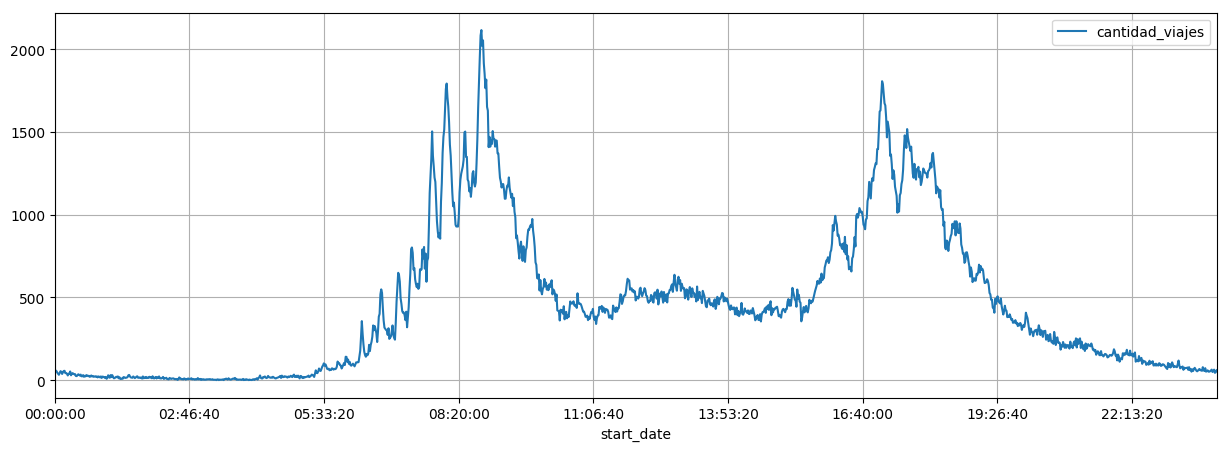

In [27]:
#Como era de esperar, el pico de viajes se da durante la mañana y la tarde, presumiblemente los horarios de salida y regreso al hogar

cantidad_viajes_segun_horario.plot.line(grid=True)

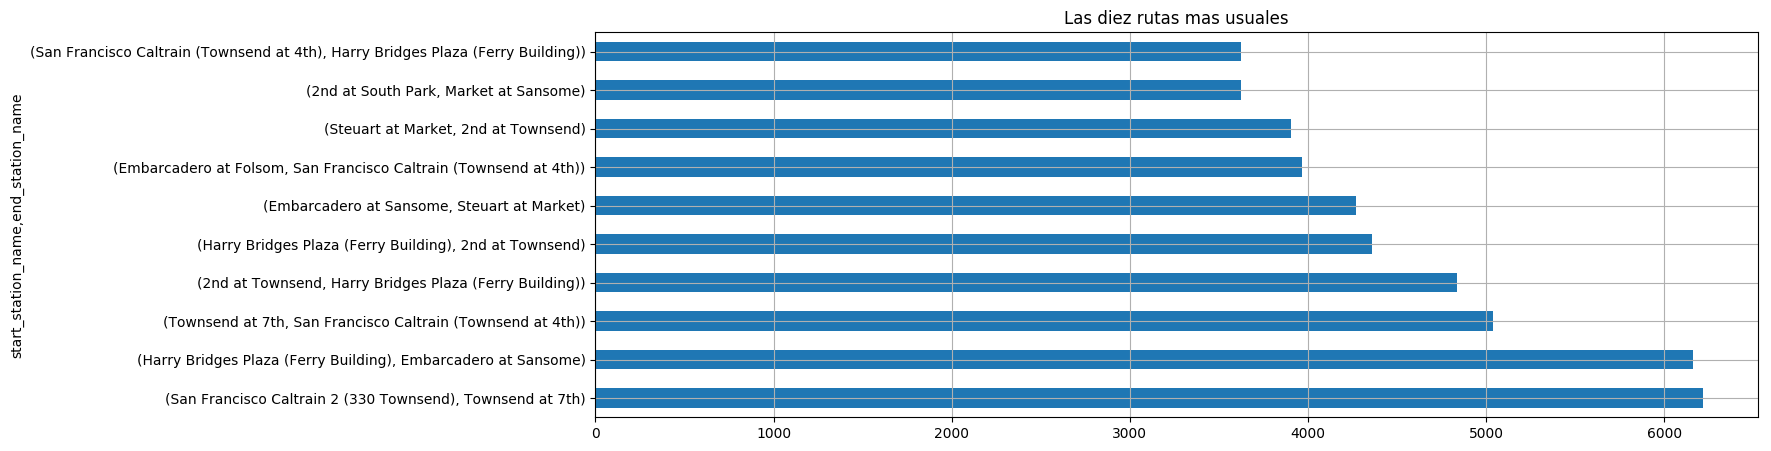

In [28]:
#Las diez rutas más populares para los ciclistas
most_popular_routes = trip.groupby('start_station_name').end_station_name.value_counts().sort_values(ascending=False)
most_popular_routes[:10].plot('barh', title = 'Las diez rutas mas usuales',grid=True)

In [29]:
#Cuántos viajes se hicieron en cada uno de los días del set de datos?
dias_viajes = trip.loc[:,['start_date']]
dias_viajes.start_date = dias_viajes.start_date.dt.date
dias_viajes['viajes_hechos'] = 1
cantidad_viajes_por_dia = dias_viajes.groupby('start_date').aggregate(sum)
cantidad_viajes_por_dia

,viajes_hechos
start_date,
2013-08-29,656
2013-08-30,617
2013-08-31,538
2013-09-01,595
2013-09-02,559
2013-09-03,528
2013-09-04,554
2013-09-05,633
2013-09-06,743


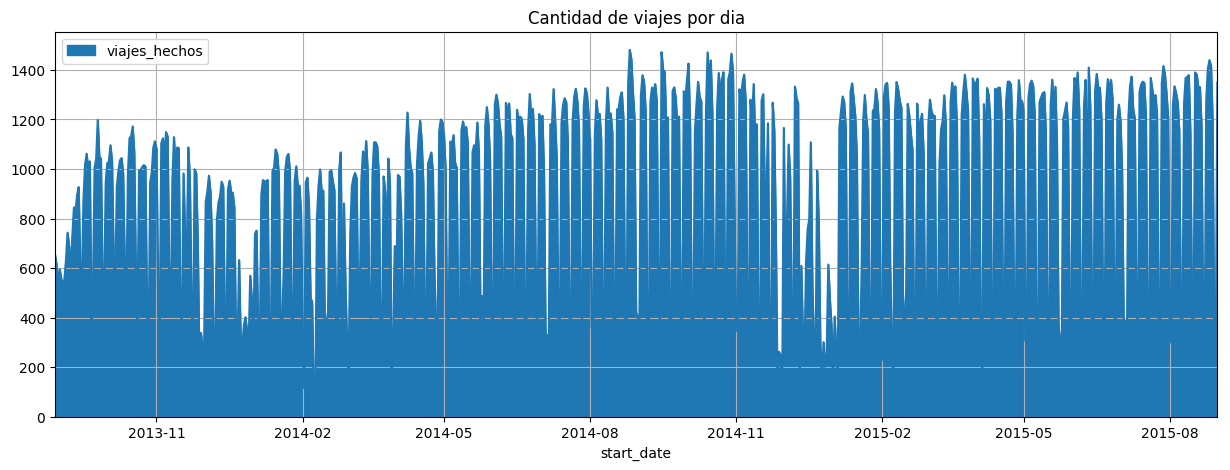

In [30]:
#En este gráfico vemos un patrón idéntico a cuando estudiamos el tráfico de la estación más popular del circuito: la cantidad de
#viajes cae drásticamente en las cercanías de diciembre-febrero (época invernal en SF) y además notamos nuevamente cómo la cantidad
#de viajes de año 2014 aumenta respecto al mismo período del año pasado
cantidad_viajes_por_dia.plot.area(grid=True, title = 'Cantidad de viajes por dia')

In [31]:
#Vamos a separar los datos meteorológicos de cada zip_code, para analizar los casos por separado

weather_94107 = weather[weather.zip_code == 94107]
weather_95113 = weather[weather.zip_code == 95113]
weather_94301 = weather[weather.zip_code == 94301]
weather_94063 = weather[weather.zip_code == 94063]
weather_94041 = weather[weather.zip_code == 94041]

clima_fecha_94107 = weather_94107.set_index('date')
clima_fecha_95113 = weather_95113.set_index('date')
clima_fecha_94301 = weather_94301.set_index('date')
clima_fecha_94063 = weather_94063.set_index('date')
clima_fecha_94041 = weather_94041.set_index('date')

In [32]:
#Vamos a modificar el dataframe trip, para que pueda saber en qué zona de SF comenzó cada viaje

station_partial = station.loc[:,['id','city']]
station_partial.rename(columns={'id':'start_station_id'},inplace=True)
trip = trip.merge(station_partial,on='start_station_id',how='inner')

In [33]:
#Conociendo las cinco zonas del dataset, averigué cuál zip code le pertenece a cada una y armé un dataframe

data = {'city':['San Francisco','San Jose','Mountain View','Palo Alto','Redwood City'],'zip_code':[94107,95113,94041,94301,94063]}
city_zip_codes = pd.DataFrame(data,columns = ['city','zip_code'])
city_zip_codes

,city,zip_code
0,San Francisco,94107
1,San Jose,95113
2,Mountain View,94041
3,Palo Alto,94301
4,Redwood City,94063


In [34]:
#Hago merge para tener en trip la información del zip code que le pertenece a la estación de inicio

trip = trip.merge(city_zip_codes,on='city',how='inner')

In [35]:
#Listo

trip = trip.rename(columns={'zip_code_x':'zip_code','city':'start_station_city','zip_code_y':'start_station_zip_code'})
trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_station_city,start_station_zip_code
0,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,San Francisco,94107
1,4765,228,2013-08-29 17:05:00,South Van Ness at Market,66,8/29/2013 17:08,Market at 10th,67,553,Subscriber,94103,San Francisco,94107
2,4560,237,2013-08-29 13:58:00,South Van Ness at Market,66,8/29/2013 14:02,San Francisco City Hall,58,438,Subscriber,94124,San Francisco,94107
3,4559,242,2013-08-29 13:58:00,South Van Ness at Market,66,8/29/2013 14:02,San Francisco City Hall,58,554,Subscriber,94115,San Francisco,94107
4,5075,348,2013-08-29 21:47:00,South Van Ness at Market,66,8/29/2013 21:52,Civic Center BART (7th at Market),72,598,Subscriber,94115,San Francisco,94107
5,4981,399,2013-08-29 19:41:00,South Van Ness at Market,66,8/29/2013 19:47,Market at 10th,67,632,Subscriber,94110,San Francisco,94107
6,4455,431,2013-08-29 13:05:00,South Van Ness at Market,66,8/29/2013 13:12,Powell Street BART,39,626,Subscriber,94122,San Francisco,94107
7,4808,572,2013-08-29 17:27:00,South Van Ness at Market,66,8/29/2013 17:37,Golden Gate at Polk,59,375,Customer,94122,San Francisco,94107
8,4398,607,2013-08-29 12:37:00,South Van Ness at Market,66,8/29/2013 12:47,Market at 4th,76,377,Subscriber,94117,San Francisco,94107
9,4729,608,2013-08-29 16:36:00,South Van Ness at Market,66,8/29/2013 16:46,Powell Street BART,39,435,Subscriber,94107,San Francisco,94107


In [36]:
#Como lo que quiero es estudiar la cantidad de viajes segun la temperatura, voy a filtar los viajes por zona para despues juntarlos
#con los datos de las condiciones climaticas que ya habia separado antes

trips_95113 = trip[trip.start_station_zip_code == 95113]
trips_94301 = trip[trip.start_station_zip_code == 94301]
trips_94107 = trip[trip.start_station_zip_code == 94107]
trips_94063 = trip[trip.start_station_zip_code == 94063]
trips_94041 = trip[trip.start_station_zip_code == 94041]

In [37]:
#Ahora tengo, para cada día en la zona 95113, la temperatura media del día

cantidad_viajes_95113 = trips_95113.loc[:,['start_date']]
cantidad_viajes_95113.start_date = cantidad_viajes_95113.start_date.dt.date
cantidad_viajes_95113['viajes_hechos'] = 1
cantidad_viajes_95113 = cantidad_viajes_95113.groupby('start_date').aggregate(sum)
trips_weather_95113 = pd.concat([cantidad_viajes_95113,clima_fecha_95113.mean_temperature_f],axis=1)
trips_weather_95113

,viajes_hechos,mean_temperature_f
2013-08-29,44,72.0
2013-08-30,62,76.0
2013-08-31,20,71.0
2013-09-01,64,72.0
2013-09-02,35,73.0
2013-09-03,27,70.0
2013-09-04,64,69.0
2013-09-05,50,68.0
2013-09-06,50,72.0
2013-09-07,25,78.0


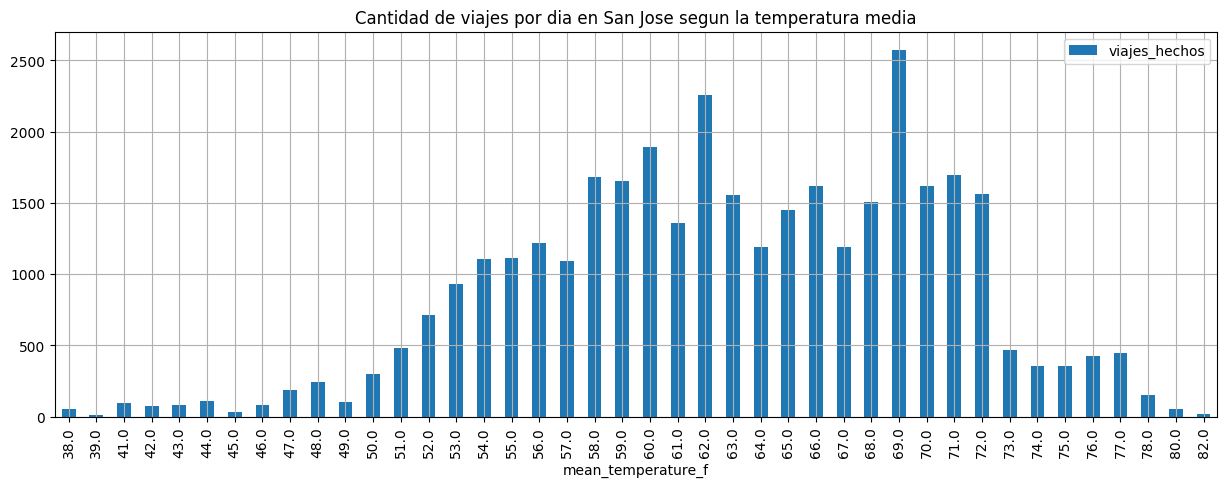

In [38]:
#Ahora agrupo por temperatura para saber cuantos viajes se hicieron con cada valor de temperatura
trips_temperature_95113 = trips_weather_95113.groupby('mean_temperature_f').aggregate(sum)
trips_temperature_95113.plot.bar(grid=True,title='Cantidad de viajes por dia en San Jose segun la temperatura media')

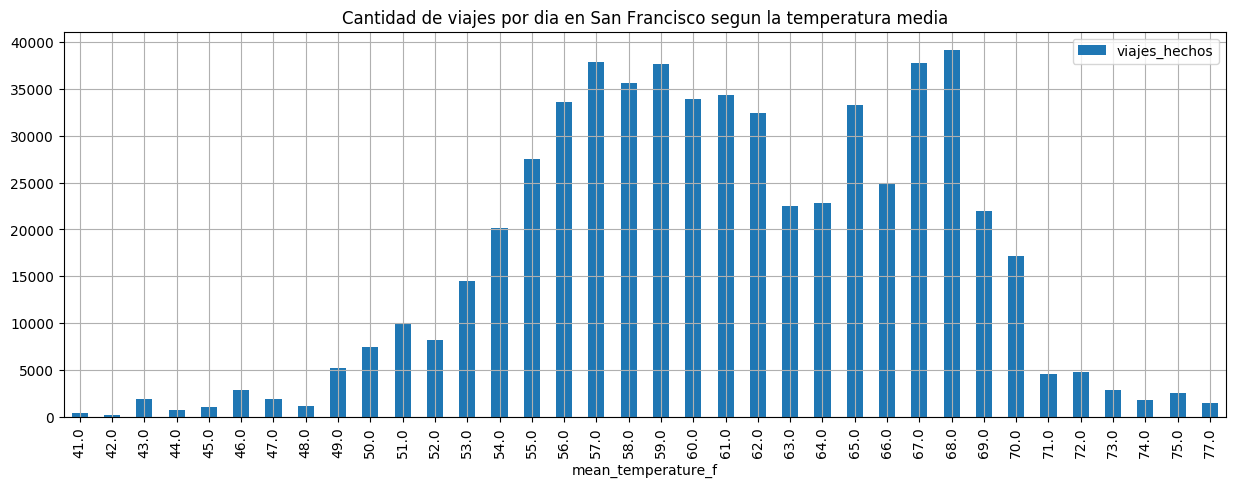

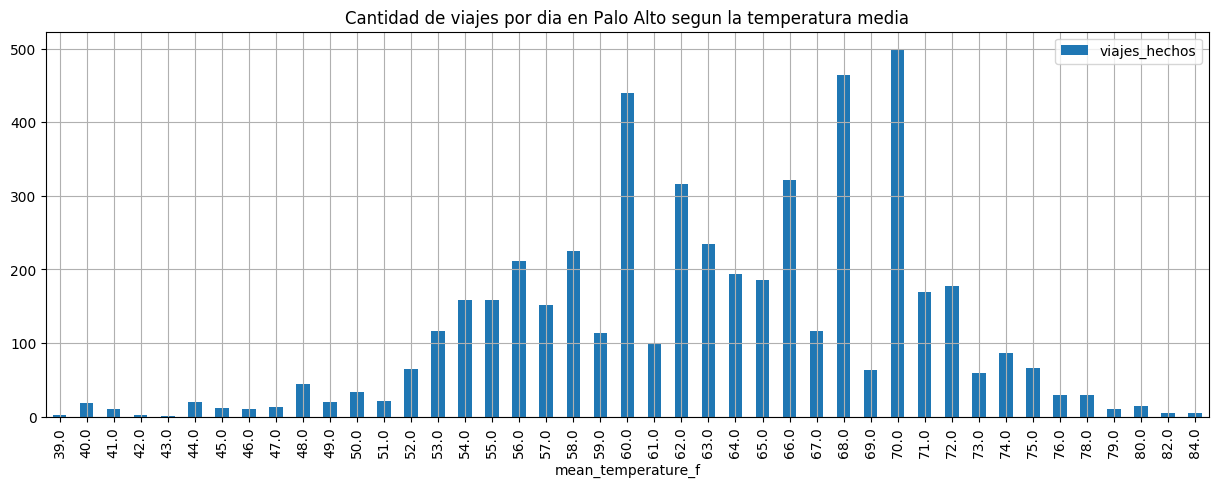

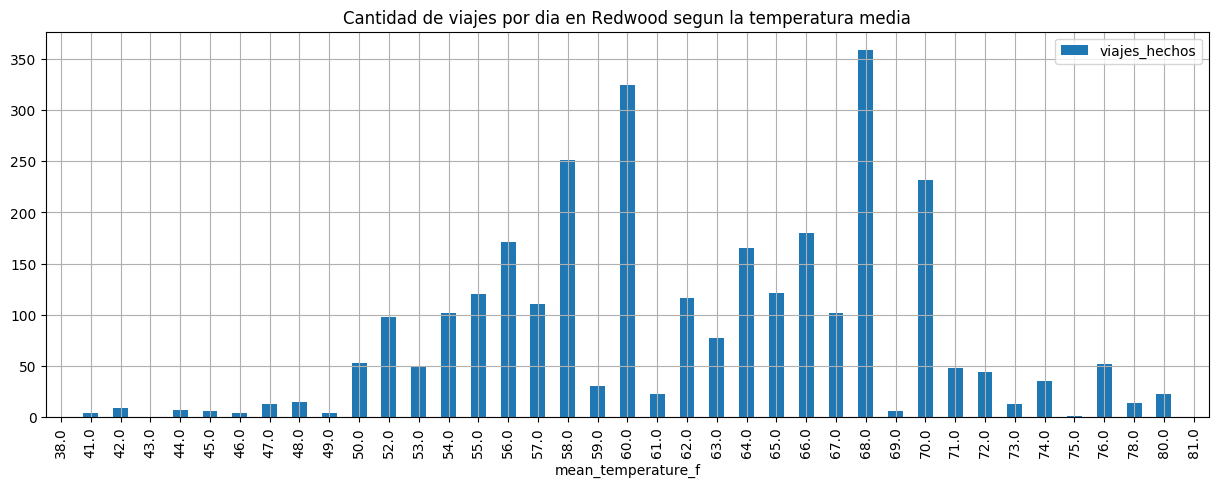

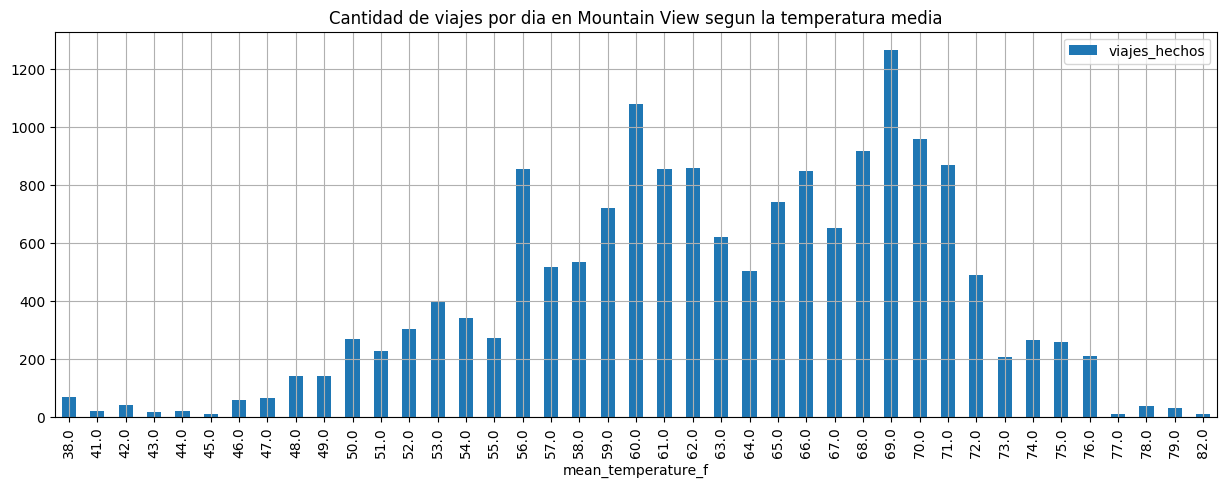

In [39]:
#Repito el proceso para las otras zonas

cantidad_viajes_94107 = trips_94107.loc[:,['start_date']]
cantidad_viajes_94107.start_date = cantidad_viajes_94107.start_date.dt.date
cantidad_viajes_94107['viajes_hechos'] = 1
cantidad_viajes_94107 = cantidad_viajes_94107.groupby('start_date').aggregate(sum)
trips_weather_94107 = pd.concat([cantidad_viajes_94107,clima_fecha_94107.mean_temperature_f],axis=1)
trips_temperature_94107 = trips_weather_94107.groupby('mean_temperature_f').aggregate(sum)
trips_temperature_94107.plot.bar(grid=True,title='Cantidad de viajes por dia en San Francisco segun la temperatura media')

cantidad_viajes_94301 = trips_94301.loc[:,['start_date']]
cantidad_viajes_94301.start_date = cantidad_viajes_94301.start_date.dt.date
cantidad_viajes_94301['viajes_hechos'] = 1
cantidad_viajes_94301 = cantidad_viajes_94301.groupby('start_date').aggregate(sum)
trips_weather_94301 = pd.concat([cantidad_viajes_94301,clima_fecha_94301.mean_temperature_f],axis=1)
trips_temperature_94301 = trips_weather_94301.groupby('mean_temperature_f').aggregate(sum)
trips_temperature_94301.plot.bar(grid=True,title='Cantidad de viajes por dia en Palo Alto segun la temperatura media')

cantidad_viajes_94063 = trips_94063.loc[:,['start_date']]
cantidad_viajes_94063.start_date = cantidad_viajes_94063.start_date.dt.date
cantidad_viajes_94063['viajes_hechos'] = 1
cantidad_viajes_94063 = cantidad_viajes_94063.groupby('start_date').aggregate(sum)
trips_weather_94063 = pd.concat([cantidad_viajes_94063,clima_fecha_94063.mean_temperature_f],axis=1)
trips_temperature_94063 = trips_weather_94063.groupby('mean_temperature_f').aggregate(sum)
trips_temperature_94063.plot.bar(grid=True,title='Cantidad de viajes por dia en Redwood segun la temperatura media')

cantidad_viajes_94041 = trips_94041.loc[:,['start_date']]
cantidad_viajes_94041.start_date = cantidad_viajes_94041.start_date.dt.date
cantidad_viajes_94041['viajes_hechos'] = 1
cantidad_viajes_94041 = cantidad_viajes_94041.groupby('start_date').aggregate(sum)
trips_weather_94041 = pd.concat([cantidad_viajes_94041,clima_fecha_94041.mean_temperature_f],axis=1)
trips_temperature_94041 = trips_weather_94041.groupby('mean_temperature_f').aggregate(sum)
trips_temperature_94041.plot.bar(grid=True,title='Cantidad de viajes por dia en Mountain View segun la temperatura media')

# En las cinco mediciones tenemos un patrón en común: la cantidad de viajes tiene una tendencia más o menos creciente hasta temperaturas 61(+/- 1) grados y una tendencia decreciente a los 69 (+/- 1) grados.
# Los dos puntos mencionados anteriormente son los dos con mayor cantidad de viajes